# Simulation of the Ratchet with ac-drive

First of all because we are in a quasistatic regiom we can take the IVC $(V(I))$ to simulate all the ratchet parameters as I explained below.

**0. Interpolation:** first I did interpolation of $V(I)$ to obtain $f_nV(I)$ and then checked if the curve has increasing $I-$values.

**1. Produce $\overline{V}_{\mathrm{dc}}$ from $f_nV(I)$:** to do so I used the function $f_nV(I)$, and then generate $I_i = I(t_i) = I_{ac}sin(\omega t_i)$ and $V_i = f_nV(I_i)$ for one period of the drive. Then I chose $N \approx 811$ per period, i.e., $t_i = i \cdot dt = T\cdot i/N$, where $i = 0...N-1$ and the period $T = 2\pi/\omega$. And then I calculated $\overline{V}_{\mathrm{dc}}$ as  $$\overline{V}_{\mathrm{dc}} = \dfrac{1}{N}\Sigma_{i=0}^{N-1} V_i$$
then repeated the above procedure for different values of $I_{\mathrm{dc}}$ to obtain the plot of $\overline{V}_{\mathrm{dc}}$ as follow,


(-1.8127961, 30.0)

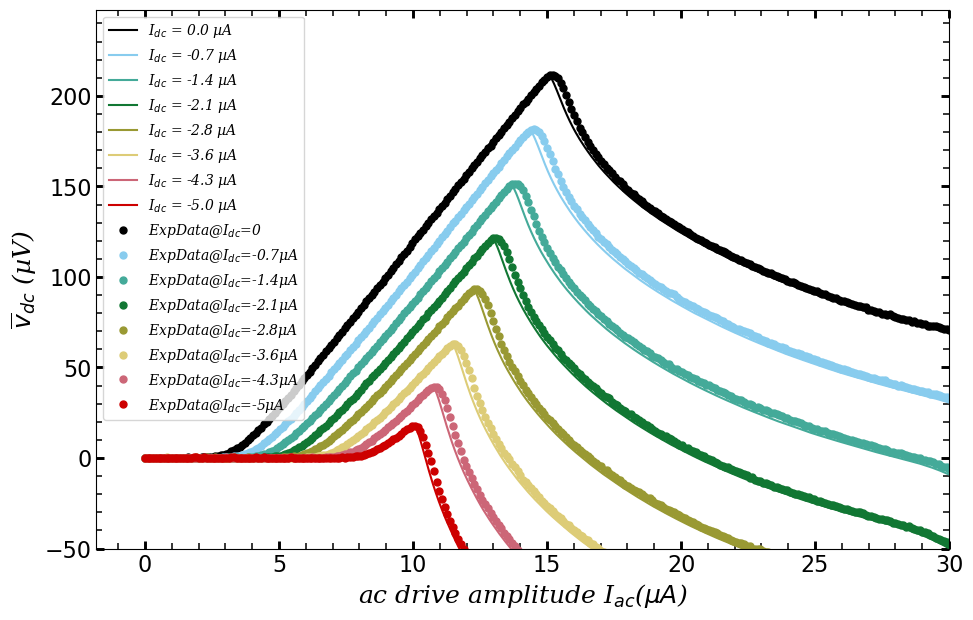

In [7]:
#Simulation of family of V_dc from asymmetric IVC for different values of I_dc driven with ac-amplitude
#vs its experimental finding

#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.font_manager as fm



fig, ax = plt.subplots(1, 1, figsize=(11, 7), sharex=True, sharey=True)
#loading experimental data asymmetric IVC
data = np.loadtxt('205-IV_av@H=-69mA.dat')

#loading experimental V_dc
data0=np.loadtxt('206-Vdc(Iac)@200Hz-69mA.dat')
x0=data0[:,0] 
y0=data0[:,1]

data1=np.loadtxt('206-Vdc(Iac)@200Hz,H=-69mA,Idc=-0.7uA.dat')
x1=data1[:,0] 
y1=data1[:,1]

data2=np.loadtxt('213-Vdc(Iac)@200Hz,H=-69mA,Idc=-1.4uA.dat')
x2=data2[:,0] 
y2=data2[:,1]

data3=np.loadtxt('220-Vdc(Iac)@200Hz,H=-69mA,Idc=-2.1uA.dat')
x3=data3[:,0] 
y3=data3[:,1]

data4=np.loadtxt('227-Vdc(Iac)@200Hz,H=-69mA,Idc=-2.8uA.dat')
x4=data4[:,0] 
y4=data4[:,1]

data5=np.loadtxt('234-Vdc(Iac)@200Hz,H=-69mA,Idc=-3.6uA.dat')
x5=data5[:,0] 
y5=data5[:,1]

data6=np.loadtxt('241-Vdc(Iac)@200Hz,H=-69mA,Idc=-4.3uA.dat')
x6=data6[:,0] 
y6=data6[:,1]

data7=np.loadtxt('248-Vdc(Iac)@200Hz,H=-69mA,Idc=-5uA.dat')
x7=data7[:,0] 
y7=data7[:,1]

# Extract the voltage and current columns from the asymmetric IVC
voltage = data[:, 0]
current = data[:, 1]

# Check that the current values are increasing
diffs = np.diff(current)
if not np.any(diffs > 0):
    print("Error: The current values are not increasing!")
    

def fnV(I):
    # Check that I is within the range of current values in the data
    Imax = np.max(data[:, 1])
    Imin = np.min(data[:, 1])
    if not np.any((I >= Imin) & (I <= Imax)):
        raise ValueError("Error: I value out of range!")
    #np.clip(I, Imax, Imin)
    V = np.interp(I, data[:, 1], data[:, 0])
    return V



# Define the parameters such as V_dcn 
N = 811
omega = 2*np.pi
Iac_values = np.linspace(0, 30e-06, N)
idc_values = [0,  -0.7e-06, -1.4e-06, -2.1e-06, -2.8e-06, -3.6e-06, -4.3e-06, -5e-06]


Imin = np.min(current)
Imax = np.max(current)
meanV_values = np.full((len(idc_values), len(Iac_values)), np.nan)

colors = ['black', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#CD0000']



for i, idc in enumerate(idc_values):
    for j, Iac in enumerate(Iac_values):
        if (Imin <= Iac + idc <= Imax) or (Imin <= -Iac + idc <= Imax):
            Vbar = 0
            I = Iac * np.sin(2*np.linspace(0, 2*np.pi, N))
            V = fnV(I + idc)
            # Compute the mean voltage value
            count = len(V)
            for v in V:
                Vbar += v
                meanV_values[i, j] = Vbar / (count)

        
    # Plot the mean voltage values for each idc
    ax.plot(Iac_values*1e06, meanV_values[i]*1e6, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))


font_path = fm.findfont(fm.FontProperties(family="Times New Roman"))
serif_font = fm.FontProperties(fname=font_path)     
font = fm.FontProperties(family='serif', style='italic', size=10)


# Plot the experimental data
ax.plot(x0*1e06, y0*1e06, 'o', color=colors[0], markersize=5, label='ExpData@I$_{dc}$=0') #markersize=
ax.plot(x1*1e06, y1*1e06, 'o', color=colors[1], markersize=5,  label='ExpData@I$_{dc}$=-0.7μA')
ax.plot(x2*1e06, y2*1e06, 'o', color=colors[2], markersize=5, label='ExpData@I$_{dc}$=-1.4μA')
ax.plot(x3*1e06, y3*1e06, 'o', color=colors[3], markersize=5, label='ExpData@I$_{dc}$=-2.1μA')
ax.plot(x4*1e06, y4*1e06, 'o', color=colors[4], markersize=5, label='ExpData@I$_{dc}$=-2.8μA')
ax.plot(x5*1e06, y5*1e06, 'o', color=colors[5], markersize=5, label='ExpData@I$_{dc}$=-3.6μA')
ax.plot(x6*1e06, y6*1e06, 'o', color=colors[6], markersize=5, label='ExpData@I$_{dc}$=-4.3μA')
ax.plot(x7*1e06, y7*1e06, 'o', color=colors[7], markersize=5, label='ExpData@I$_{dc}$=-5μA')


#fig, ax = plt.subplots(1, 1, figsize=(11, 8), sharex=True, sharey=True)

#make the plot beautiful    
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(5))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(5))
ax.tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
ax.tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
ax.tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
ax.tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
ax.xaxis.set_ticks_position('default')
ax.yaxis.set_ticks_position('default')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(loc='lower left', prop=font)
plt.xlabel("ac drive amplitude I$_{ac}$($µA$)", fontname="serif", style='italic', fontsize=18)
plt.ylabel("$\overline{v}_{dc}$ (µV)", fontname="serif", style='italic', fontsize=18)
plt.legend(loc='upper left', prop=font)
plt.ylim(bottom=-50)
plt.xlim(right=30) # Remove this line as it is causing an AttributeError.















**2. Produce $P_{\mathrm{in}}(I_{\mathrm{ac}})$ at given set of $I_{\mathrm{dc}}$ values:** For this, I took the arrays $V_i$ and $I_i$, then multiply them to find $P_{\mathrm{in}} = V_i \cdot I_i$. Then calculate the average as $$\overline{P}_{\mathrm{in}} = \dfrac{1}{N} \Sigma_{i=0}^{N-1} P_{\mathrm{in}}(I_{\mathrm{ac}})$$

**3. Produce $P_{\mathrm{out}}(I_{\mathrm{ac}})$ at given set of $I_{\mathrm{dc}}$ values:** For this, I just multiply $\overline{V}_{\mathrm{dc}}(I_{\mathrm{ac}})$ curves for different $I_{\mathrm{dc}}$.

**4. Produce efficiency $\eta(I_{\mathrm{ac}})$ at given set of $I_{\mathrm{dc}}$ values:** for this just divided number 3 to number 2


Text(0.8, 0.9, '(c)')

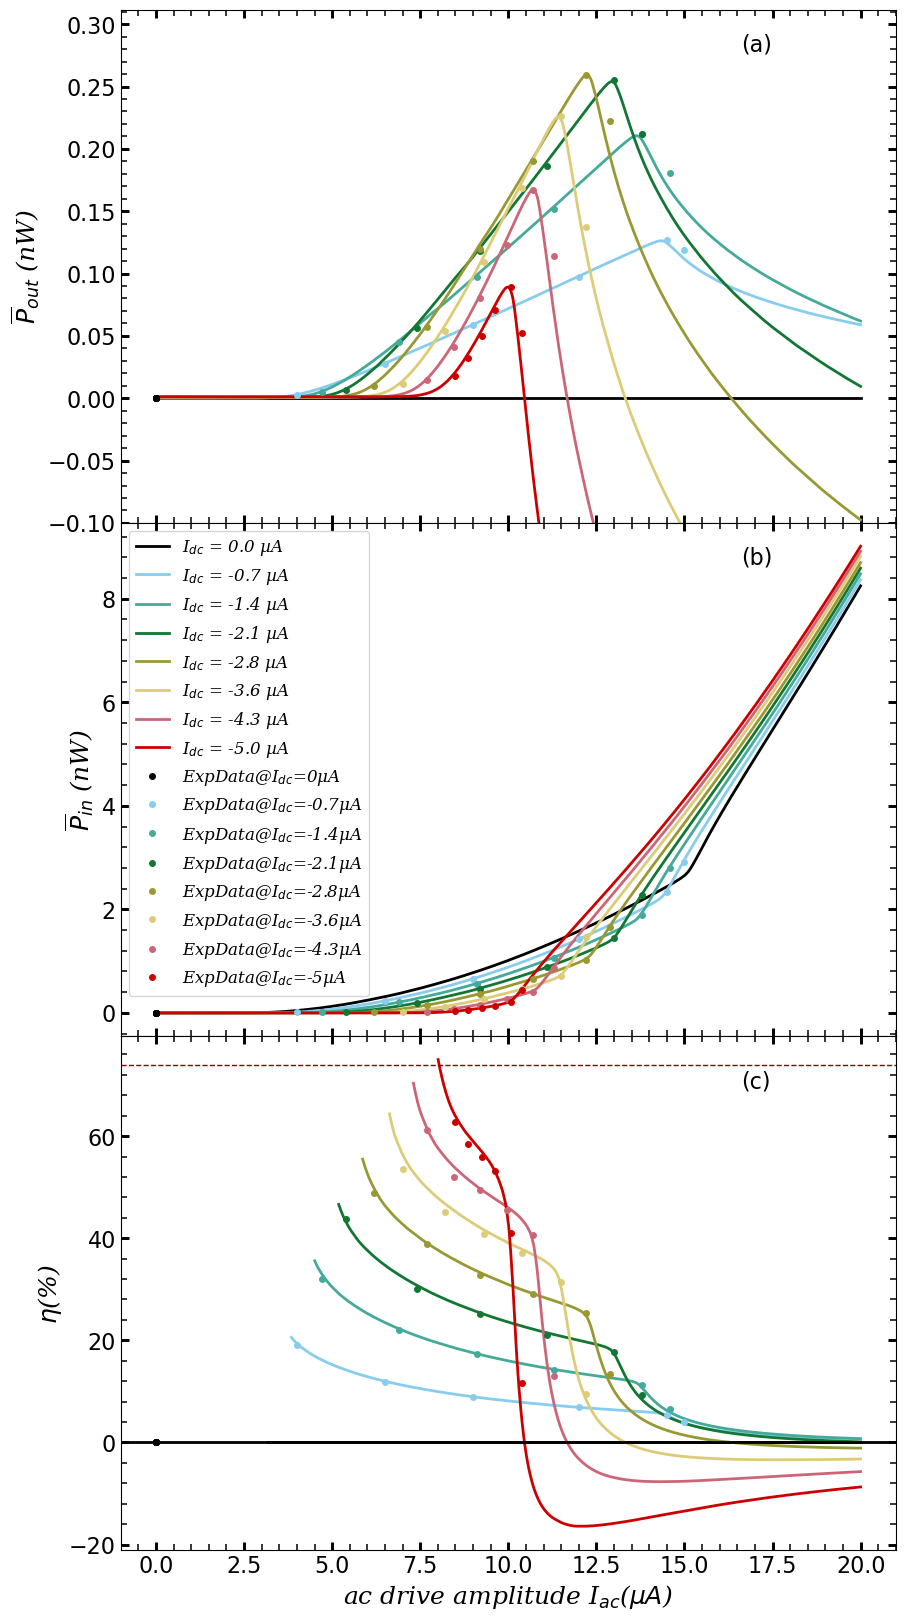

In [3]:
#Simulation of P_out, P_in, efficiency from asymmetric IVC for different values of I_dc driven with ac-amplitude
#vs its experimental finding!


#%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.font_manager as fm



fig, axs = plt.subplots(3, figsize=(12, 10), sharex=False, sharey=False)
axis_font = {'fontname':'Arial', 'size':'30'}
fig.set_size_inches(10, 20)
fig.subplots_adjust(wspace=0.4, hspace=0)
#gs = fig.add_gridspec(4, hspace=-2)
axs[0].tick_params(labelsize=16)
axs[1].tick_params(labelsize=16)
axs[2].tick_params(labelsize=16)

#loading experimental data asymmetric IVC
data = np.loadtxt('205-IV_av@H=-69mA.dat')

# Extract the voltage and current columns from the asymmetric IVC
voltage = data[:, 0]
current = data[:, 1]

# Check that the current values are increasing
diffs = np.diff(current)
if not np.any(diffs > 0):
    print("Error: The current values are not increasing!")

def fnV(I):
    # Check that I is within the range of current values in the data
    Imax = np.max(data[:, 1])
    Imin = np.min(data[:, 1])
    if not np.any((I >= Imin) & (I <= Imax)):
        raise ValueError("Error: I value out of range!")
    #np.clip(I, Imax, Imin)
    V = np.interp(I, data[:, 1], data[:, 0])
    return V

# Defining the parameters such as P_out, P_in and efficiency
N = 811
omega = 2*np.pi
Iac_values = np.linspace(0, 20e-06, 1000)
idc_values = [0, -0.7e-06, -1.4e-06, -2.1e-06, -2.8e-06, -3.6e-06, -4.3e-06, -5e-06]

Imin = np.min(current)
Imax = np.max(current)


P_out  = np.zeros((len(idc_values), len(Iac_values)))# Create an array to store the efficiency for each Iac and idc value
P_in =  np.zeros((len(idc_values), len(Iac_values)))
efficiency_values = np.zeros((len(idc_values), len(Iac_values)))
Vbar_values= np.zeros((len(idc_values), len(Iac_values)))


for i, idc in enumerate(idc_values):
    for j, Iac in enumerate(Iac_values):
        #Vbar_values = []
        if (Imin <= Iac + idc <= Imax) or (Imin <= -Iac + idc <= Imax):
            I = Iac * np.sin(omega * np.linspace(0, 1, N - 1))
            powerIn = 0
            Powerbar = 0
            eta = 0
            Vsum = 0
            V = fnV(I + idc)
            for v in V:
                Vsum += v
            Vbar = Vsum / len(V)
            Vbar_values[i, j] = Vbar
            P_out[i, j] = -idc * Vbar
            powerIn = V * I
            Powerbar = np.mean(powerIn)
            P_in[i, j] = Powerbar

            if P_in[i, j] <= 1e-11 or np.isnan(P_in[i, j]) or np.isinf(P_in[i, j]) or np.isinf(P_out[i, j]):
                efficiency_values[i, j] = np.nan
            else:
                efficiency = P_out[i, j] / P_in[i, j]
                efficiency_values[i, j] = efficiency

    axs[0].plot(Iac_values*1e+06, P_out[i]*1e9, color=colors[i % len(colors)],linewidth=2.0, label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    axs[1].plot(Iac_values*1e+06, P_in[i]*1e9, color=colors[i % len(colors)],linewidth=2.0, label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    axs[2].plot(Iac_values*1e+06, efficiency_values[i]*100, color=colors[i % len(colors)],linewidth=2.0, label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    #axs[3].plot(Iac_values, Vbar_values[i], label=f'idc = {idc * 1e6:.1f} uA')
    
    
# blue'#332288'
colors = ['black', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#CD0000']       
font_path = fm.findfont(fm.FontProperties(family="Times New Roman"))
serif_font = fm.FontProperties(fname=font_path)     
font = fm.FontProperties(family='serif', style='italic', size=12)
  

#Reading experimental data and plot them, P_out and P_in and eta
I_ac0 = [0,0,0,0,0,0] 
I_ac1 = [4, 6.5, 9, 12, 14.5, 15] 
I_ac2= [4.7, 6.9, 9.1, 11.3, 13.8 , 14.6]
I_ac3= [5.4, 7.4, 9.2, 11.1, 13, 13.8] 
I_ac4= [ 6.2, 7.7, 9.2, 10.7, 12.2, 12.9] 
I_ac5= [ 7, 8.2, 9.3, 10.4, 11.5, 12.2] 
I_ac6= [ 7.7, 8.45, 9.2, 9.95, 10.7, 11.3]
I_ac7= [ 8.5, 8.87, 9.24, 9.63, 10.07, 10.4]    
    
P_out_0 = [0,0,0,0,0,0]
P_out_1 = [2.70E-3, 2.75E-2, 5.85E-2, 9.72E-2, 1.27E-1, 1.19E-1]
P_out_2 = [5.00E-3, 4.50E-2, 9.75E-2, 1.52E-1, 2.12E-1, 1.81E-1]
P_out_3 = [6.60E-3, 5.60E-2, 1.18E-1, 1.86E-1, 2.55E-1, 2.12E-1]
P_out_4 = [1.00E-2, 5.70E-2, 1.20E-1, 1.90E-1, 2.59E-1, 2.22E-1]
P_out_5 = [1.15E-2, 5.38E-2, 1.09E-1, 1.69E-1, 2.26E-1, 1.37E-1]
P_out_6 = [1.45E-2, 4.12E-2, 8.00E-2, 1.23E-1, 1.67E-1, 1.14E-1]
P_out_7 = [1.80E-2, 3.22E-2, 5.00E-2, 7.10E-2, 8.93E-2, 5.20E-2]

axs[0].plot(I_ac0, P_out_0,'o' ,color=colors[0], markersize=4, label='ExpData@I$_{dc}$=0')
axs[0].plot(I_ac1, P_out_1,'o' ,color=colors[1], markersize=4, label='ExpData@I$_{dc}$=-0.7µA')
axs[0].plot(I_ac2, P_out_2,'o' ,color=colors[2], markersize=4,  label='ExpData@I$_{dc}$=-1.4µA')
axs[0].plot(I_ac3, P_out_3,'o' ,color=colors[3], markersize=4,  label='ExpData@I$_{dc}$=-2.1µA')
axs[0].plot(I_ac4, P_out_4,'o' ,color=colors[4], markersize=4,  label='ExpData@I$_{dc}$=-2.8µA')
axs[0].plot(I_ac5, P_out_5,'o' ,color=colors[5], markersize=4,  label='ExpData@I$_{dc}$=-3.6µA')
axs[0].plot(I_ac6, P_out_6,'o' ,color=colors[6], markersize=4,  label='ExpData@I$_{dc}$=-4.3µA')
axs[0].plot(I_ac7, P_out_7,'o' ,color=colors[7], markersize=4,  label='ExpData@I$_{dc}$=-5µA')
#axs[0].set_title('Dose=500R_L=17750nm_W=300nm_H=+75mA', fontsize=12);

axs[0].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[0].xaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[0].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[0].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[0].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[0].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[0].xaxis.set_ticks_position('default')
axs[0].yaxis.set_ticks_position('default')
axs[0].set_xlabel("ac drive amplitude I$_{ac}$($µA$)", fontname="serif",  style='italic', fontsize=18)
axs[0].set_ylabel( "$\overline{P}_{out}$ (nW)", fontname="serif", style='italic', fontsize=18)
axs[0].xaxis.set_tick_params(labelsize=16)
axs[0].yaxis.set_tick_params(labelsize=16)

#axs[0].legend(loc='upper left', prop=font)
axs[0].set_ylim(bottom=-0.1)

#axs[0].legend(loc='upper left',  prop=font)

P_in_0 = [0,0,0,0,0,0]
P_in_1 = [1.42E-2, 2.31E-1, 6.57E-1, 1.42, 2.33, 2.92]
P_in_2 = [1.56E-2, 2.04E-1, 5.65E-1, 1.07, 1.89, 2.79]
P_in_3 = [1.51E-2, 1.86E-1, 4.70E-1, 8.79E-1, 1.44, 2.28]
P_in_4 = [ 2.05E-2, 1.47E-1, 3.66E-1, 6.55E-1, 1.02, 1.66]
P_in_5 = [ 2.15E-2, 1.19E-1, 2.65E-1, 4.56E-1, 7.20E-1, 1.46]
P_in_6 = [ 2.37E-2, 7.92E-2, 1.62E-1, 2.70E-1, 4.10E-1, 8.73E-1]
P_in_7 = [ 2.87E-2, 5.52E-2, 8.95E-2, 1.34E-1, 2.16E-1, 4.46E-1]

axs[1].plot(I_ac0, P_in_0,'o' ,color=colors[0], markersize=4, label='ExpData@I$_{dc}$=0μA')
axs[1].plot(I_ac1, P_in_1,'o' ,color=colors[1], markersize=4, label='ExpData@I$_{dc}$=-0.7μA')
axs[1].plot(I_ac2, P_in_2,'o' ,color=colors[2], markersize=4, label='ExpData@I$_{dc}$=-1.4μA')
axs[1].plot(I_ac3, P_in_3,'o' ,color=colors[3], markersize=4, label='ExpData@I$_{dc}$=-2.1μA')
axs[1].plot(I_ac4, P_in_4,'o' ,color=colors[4], markersize=4, label='ExpData@I$_{dc}$=-2.8μA')
axs[1].plot(I_ac5, P_in_5,'o' ,color=colors[5], markersize=4, label='ExpData@I$_{dc}$=-3.6μA')
axs[1].plot(I_ac6, P_in_6,'o' ,color=colors[6], markersize=4, label='ExpData@I$_{dc}$=-4.3μA')
axs[1].plot(I_ac7, P_in_7,'o' ,color=colors[7], markersize=4, label='ExpData@I$_{dc}$=-5µA')
#axs[0].set_title('Dose=500R_L=17750nm_W=300nm_H=+75mA', fontsize=12);
#plt.legend(loc='upper left', prop=font)

axs[1].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[1].xaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[1].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[1].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[1].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[1].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[1].xaxis.set_ticks_position('default')
axs[1].yaxis.set_ticks_position('default')
axs[1].set_xlabel("ac drive amplitude I$_{ac}$($µA$)", fontname="serif",  style='italic', fontsize=18)
axs[1].set_ylabel( "$\overline{P}_{in}$ (nW)", fontname="serif", style='italic', fontsize=18)
axs[1].xaxis.set_tick_params(labelsize=16)
axs[1].yaxis.set_tick_params(labelsize=16)
axs[1].legend(loc='upper left', prop=font)
#axs[1].set_ylim(top=5)
#axs[1].set_xlim(right=17.5)


eta0=[0, 0, 0, 0, 0, 0]
eta1=[19.08, 11.89, 8.9, 6.84, 5.45, 4.07]
eta2=[32.02, 22.02, 17.27, 14.2, 11.2, 6.48]
eta3=[ 43.72, 30.03, 25.1, 21.1, 17.75, 9.32]
eta4=[ 48.79, 38.84, 32.76, 29, 25.3, 13.37]
eta5=[ 53.46, 45.09, 40.91, 37.07, 31.39, 9.4]
eta6=[ 61.1, 52.02, 49.43, 45.58, 40.69, 13.06]
eta7=[ 62.69, 58.5, 56, 53.18, 41.03, 11.66]


#determining the maximum efficiency in the eta plot
h1= axs[2].axhline(y=74,color='darkred' ,lw=1, label='Maximum Efficiency @74%')
h1.set_linestyle('--')
#axs[2].legend(loc='upper right', prop=font)
h2= axs[2].axhline(y=0,color='black' ,lw=2)
h2.set_linestyle('-')


axs[2].plot(I_ac0, eta0,'o' ,color=colors[0], markersize=4,label='ExpData@I$_{dc}$=0μA')
axs[2].plot(I_ac1, eta1,'o' ,color=colors[1], markersize=4, label='ExpData@I$_{dc}$=-0.7μA')
axs[2].plot(I_ac2, eta2,'o' ,color=colors[2], markersize=4, label='ExpData@I$_{dc}$=-1.4μA')
axs[2].plot(I_ac3, eta3,'o' ,color=colors[3], markersize=4, label='ExpData@I$_{dc}$=-2.1μA')
axs[2].plot(I_ac4, eta4,'o' ,color=colors[4], markersize=4,  label='ExpData@I$_{dc}$=-2.8μA')
axs[2].plot(I_ac5, eta5,'o' ,color=colors[5], markersize=4, label='ExpData@I$_{dc}$=-3.6μA')
axs[2].plot(I_ac6, eta6,'o' ,color=colors[6], markersize=4, label='ExpData@I$_{dc}$=-4.3μA')
axs[2].plot(I_ac7, eta7,'o' ,color=colors[7], markersize=4, label='ExpData@I$_{dc}$=-5µA')


axs[2].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[2].xaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[2].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[2].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[2].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[2].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[2].xaxis.set_ticks_position('default')
axs[2].yaxis.set_ticks_position('default')
axs[2].set_xlabel("ac drive amplitude I$_{ac}$($µA$)", fontname="serif",  style='italic', fontsize=18)
axs[2].set_ylabel( "$\eta$(%) ", fontname="serif", style='italic', fontsize=18)
axs[2].xaxis.set_tick_params(labelsize=16)
axs[2].yaxis.set_tick_params(labelsize=16)
#axs[2].set_xlim(left=2.5)
#axs[2].set_xlim(right=17.5)
#axs[2].legend(loc='upper right', prop=font)


#make signs in the plots
axs[0].text(0.8, 0.92, '(a)', transform=axs[0].transAxes, fontsize=16)
axs[1].text(0.8, 0.92, '(b)', transform=axs[1].transAxes, fontsize=16)
axs[2].text(0.8, 0.9, '(c)', transform=axs[2].transAxes, fontsize=16)